In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,puri diplomatic greens,sector 111,2.65,11963.0,2215.0,Super Built up area 2215(205.78 sq.m.),3,4,3+,...,2215.0,NaN,NaN,1,1,1,1,0,0,65
1,flat,godrej nature plus,sector 33 road,1.67,10500.0,1590.0,Carpet area: 1671 (155.24 sq.m.),3,2,2,...,NaN,NaN,1671.0,0,0,0,0,0,0,67
2,flat,antriksh heights,sector 84,0.69,5111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3+,...,1350.0,NaN,NaN,1,0,0,0,0,0,59
3,house,international city by sobha phase 1,sector 109,5.90,24280.0,2430.0,Plot area 270(225.75 sq.m.),4,5,2,...,NaN,2430.0,NaN,0,1,0,0,0,2,111
4,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.)Carpet a...,2,2,3+,...,1640.0,NaN,1148.0,0,0,1,0,0,0,141


In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [7]:
df.shape

(3803, 23)

In [8]:
df.duplicated().sum()

126

In [9]:
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  258
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3316 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               3545 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [14]:
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,puri diplomatic greens,sector 111,2.65,11963.0,2215.0,Super Built up area 2215(205.78 sq.m.),3,4,3+,...,2215.0,NaN,NaN,1,1,1,1,0,0,65
1,flat,godrej nature plus,sector 33 road,1.67,10500.0,1590.0,Carpet area: 1671 (155.24 sq.m.),3,2,2,...,NaN,NaN,1671.0,0,0,0,0,0,0,67


## Property Type

In [19]:
df['property_type'].value_counts()

flat     2818
house     859
Name: property_type, dtype: int64

<AxesSubplot: >

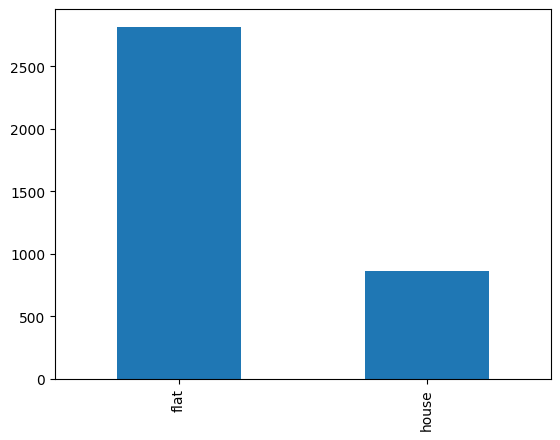

In [29]:
df['property_type'].value_counts().plot(kind = 'bar')

## Society

In [31]:
df['society'].value_counts()

tulip violet                            75
ss the leaf                             73
dlf new town heights                    42
shapoorji pallonji joyville gurugram    42
signature global park                   35
                                        ..
mittal cosmos executive apartments       1
private house                            1
.                                        1
signature global rosellia                1
huda housing board colony                1
Name: society, Length: 674, dtype: int64

## Sector

In [33]:
# unique sectors
df['sector'].value_counts()

sohna road road    166
sector 85          108
sector 102         107
sector 92          100
sector 69           93
                  ... 
sector 17b           3
sector 73            3
sector 27            3
sector 17a           3
sector 37            1
Name: sector, Length: 114, dtype: int64

<AxesSubplot: >

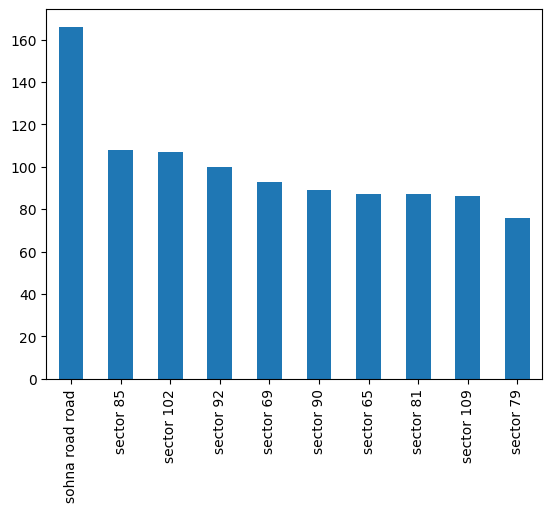

In [34]:
# unique sectors
df['sector'].value_counts().head(10).plot(kind = 'bar')